In [158]:
using Gen
include("../src/inference/particle_filter.jl")

gp_particle_filter

Function: Lin(0.3717296266910519, 0.9649258304890241)


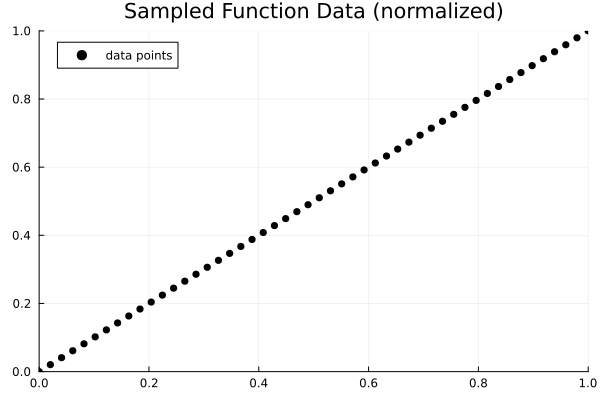

In [159]:
# generate data
using Plots

include("../src/data_gen.jl")

fn = function_prior();
xs, ys, fn, (xmin_orig, xmax_orig) = get_data(fn, 50);


# xs, ys, _, _ = load_data_run("/Users/witt/work/Goal-Conditioned-GP2/demos/data/run_2.json")
println("Function: ", fn)
scatter(xs, ys, xlims=(0, 1), ylims=(0, 1), 
        title="Sampled Function Data (normalized)", label="data points", color="black")


In [160]:
# include("../src/inference/relevance.jl")

traces = gp_particle_filter(xs, ys, 10, 10, 10, 100)

# Look at results
for (i, tr) in enumerate(traces)
    println("Sample $i: $(get_retval(tr))")
end

Sample 1: Linear(0.021144825585093452)
Sample 2: Plus(Linear(0.5717262965420549), Constant(0.1517558378822953), 3)
Sample 3: Plus(Plus(Linear(0.39641707857118014), Linear(0.7286108138377927), 3), Linear(0.013127929530695748), 5)
Sample 4: Linear(0.0032896310214134417)
Sample 5: Linear(0.011744736943458234)
Sample 6: Plus(Linear(0.5717262965420549), Constant(0.1517558378822953), 3)
Sample 7: Plus(Plus(Linear(0.39641707857118014), Linear(0.7286108138377927), 3), Linear(0.013127929530695748), 5)
Sample 8: Linear(0.0032896310214134417)
Sample 9: Plus(Plus(Linear(0.39641707857118014), Linear(0.7286108138377927), 3), Linear(0.013127929530695748), 5)
Sample 10: Plus(Plus(Linear(0.39641707857118014), Linear(0.7286108138377927), 3), Linear(0.013127929530695748), 5)
Sample 11: Plus(Linear(0.5717262965420549), Constant(0.1517558378822953), 3)
Sample 12: Linear(0.011744736943458234)
Sample 13: Plus(Linear(0.5717262965420549), Constant(0.1517558378822953), 3)
Sample 14: Linear(0.021144825585093452)

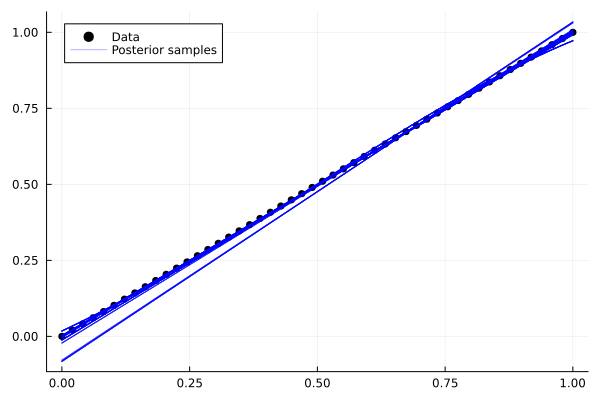

In [161]:
include("../src/covariance.jl")


function plot_posterior_samples(traces, xs, ys)
    p = scatter(xs, ys, label="Data", color=:black, markersize=4)
    
    x_test = collect(range(minimum(xs), maximum(xs), length=100))
    
    # Plot each posterior sample
    for (i, tr) in enumerate(traces)
        kernel = get_retval(tr)
        noise = tr[:noise]
        
        # Posterior predictive mean
        μ, σ² = compute_predictive(kernel, noise, xs, ys, x_test)
        
        plot!(p, x_test, μ, alpha=0.3, label=(i==1 ? "Posterior samples" : ""), 
              color=:blue)
    end
    
    return p
end

plot_posterior_samples(traces, xs, ys)